In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm


In [49]:
np.random.seed()
df=pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


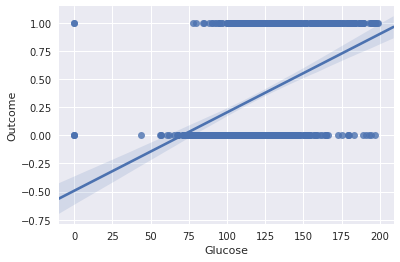

In [6]:
sns.regplot(x="Glucose", y="Outcome", data=df)

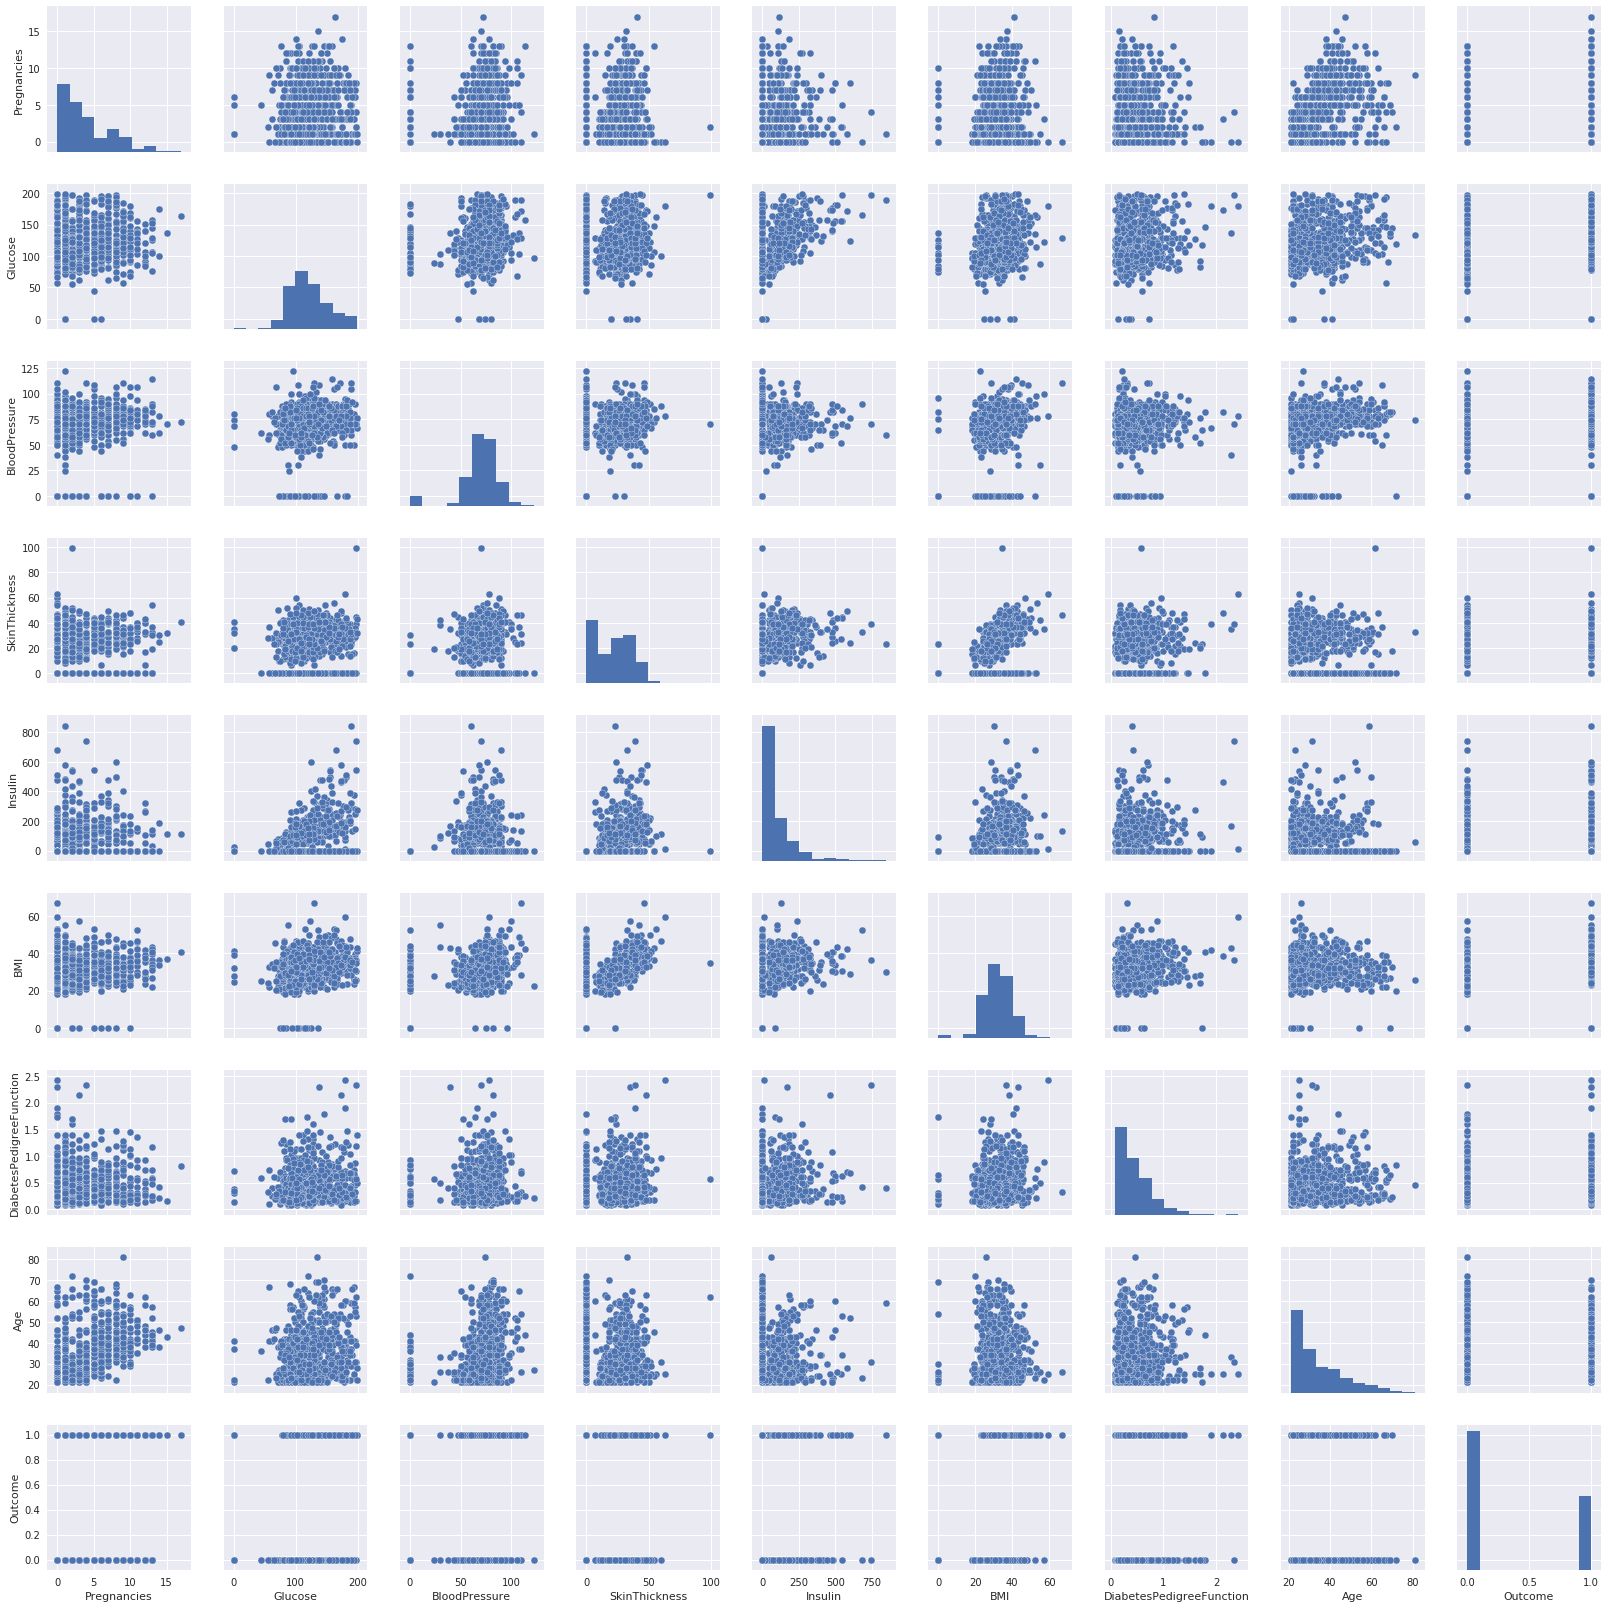

In [7]:
sns.pairplot(data=df)

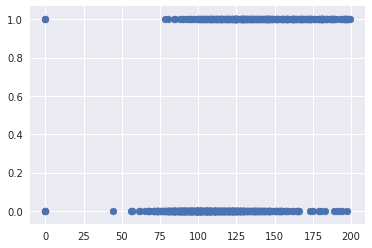

In [50]:
plt.scatter(df['Glucose'],df['Outcome'])

In [8]:
from scipy import stats

### P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

    p-value is < 0.001: we say there is strong evidence that the correlation is significant.
    the p-value is < 0.05: there is moderate evidence that the correlation is significant.
    the p-value is < 0.1: there is weak evidence that the correlation is significant.
    the p-value is > 0.1: there is no evidence that the correlation is significant.

**Glucose vs Outcome**

Let's calculate the Pearson Correlation Coefficient and P-value of 'Glucose' and 'Outcome'.

In [9]:
pearson_coef, p_value = stats.pearsonr(df['Glucose'], df['Outcome'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.4665813983068741  with a P-value of P = 8.935431645287658e-43


**Conclusion**

since p-value<0.001 the correlation between Glucose and Outcome is significant although the linear relationship isn't extremely strong (~0.466)


**Insulin vs Outcome**

Let's calculate the Pearson Correlation Coefficient and P-value of 'Insulin' and 'Outcome'.


In [10]:
pearson_coef, p_value = stats.pearsonr(df['Insulin'], df['Outcome'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.13054795488404766  with a P-value of P = 0.0002861864603602735


**BMI vs Outcome**

Let's calculate the Pearson Correlation Coefficient and P-value of 'BMI' and 'Outcome'.


In [11]:
pearson_coef, p_value = stats.pearsonr(df['BMI'], df['Outcome'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.2926946626444455  with a P-value of P = 1.2298074873114397e-16


**Conclusion**

since p-value>0.1 the correlation between BMI and Outcome is insignificant.


**Age vs Outcome**

Let's calculate the Pearson Correlation Coefficient and P-value of 'BMI' and 'Outcome'.


In [12]:
pearson_coef, p_value = stats.pearsonr(df['Age'], df['Outcome'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.2383559830271978  with a P-value of P = 2.2099754606650332e-11


**Conclusion**

since p-value>0.1 the correlation between Age and Outcome is insignificant.


**BloodPressure vs Outcome**

Let's calculate the Pearson Correlation Coefficient and P-value of 'BloodPressure' and 'Outcome'.


In [13]:
pearson_coef, p_value = stats.pearsonr(df['BloodPressure'], df['Outcome'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.06506835955033284  with a P-value of P = 0.07151390009774597


**Conclusion**

since p-value<0.1 the correlation between BloodPressure and Outcome is weak.


**Pregnancies vs Outcome**

Let's calculate the Pearson Correlation Coefficient and P-value of 'Pregnancies' and 'Outcome'.


In [14]:
pearson_coef, p_value = stats.pearsonr(df['Pregnancies'], df['Outcome'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.2218981530339868  with a P-value of P = 5.065127298052554e-10


**Conclusion**

since p-value>0.1 the correlation between Pregnancies and Outcome is insignificant.


**SkinThickness vs Outcome**

Let's calculate the Pearson Correlation Coefficient and P-value of 'SkinThickness' and 'Outcome'.


In [15]:
pearson_coef, p_value = stats.pearsonr(df['SkinThickness'], df['Outcome'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.07475223191831938  with a P-value of P = 0.03834770482048333


**Conclusion**

since p-value<0.1 the correlation between SkinThickness and Outcome is weak.


**DiabetesPedigreeFunction vs Outcome**

Let's calculate the Pearson Correlation Coefficient and P-value of 'DiabetesPedigreeFunction' and 'Outcome'.


In [16]:
pearson_coef, p_value = stats.pearsonr(df['DiabetesPedigreeFunction'], df['Outcome'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.17384406565296004  with a P-value of P = 1.2546070101485626e-06


**Conclusion**

since p-value>0.1 the correlation between DiabetesPedigreeFunction and Outcome is insignificant.


In [17]:
y=df['Outcome']
df=df.drop('Outcome',axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


**Normalization**

This normalization can make some statistical analyses easier down the road.
By making the ranges consistent between variables,
normalization enables a fair comparison between the different features,
making sure they have the same impact. 

In [18]:

scaler=StandardScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(data=df,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


**Train/Test Split**

The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
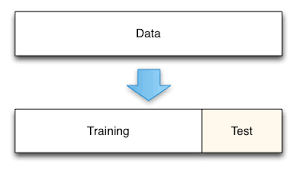

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20,shuffle=False)

In [43]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(lg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(lg.score(X_test, y_test)))
y_predicted=lg.predict(X_test)

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.77


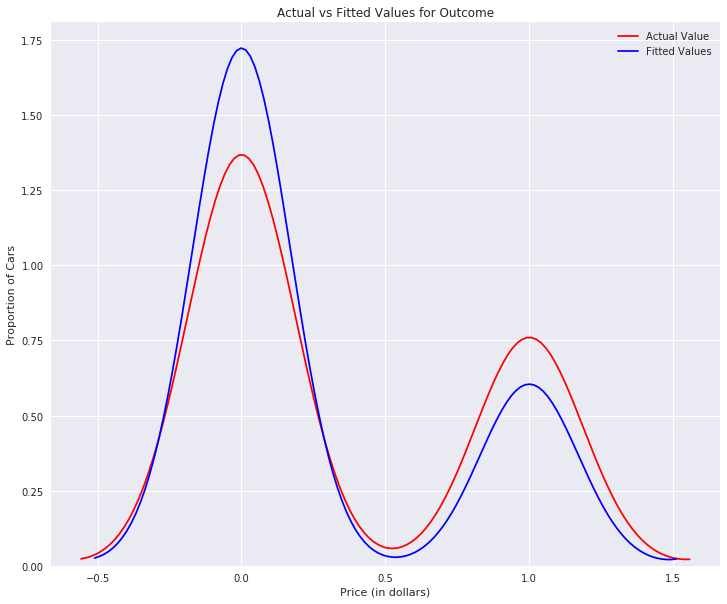

In [45]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Outcome')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_predicted=lm.predict(X_test)
lm.score(X_train,y_train)

0.3016037937886409

In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predicted)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  0.1609436991521223


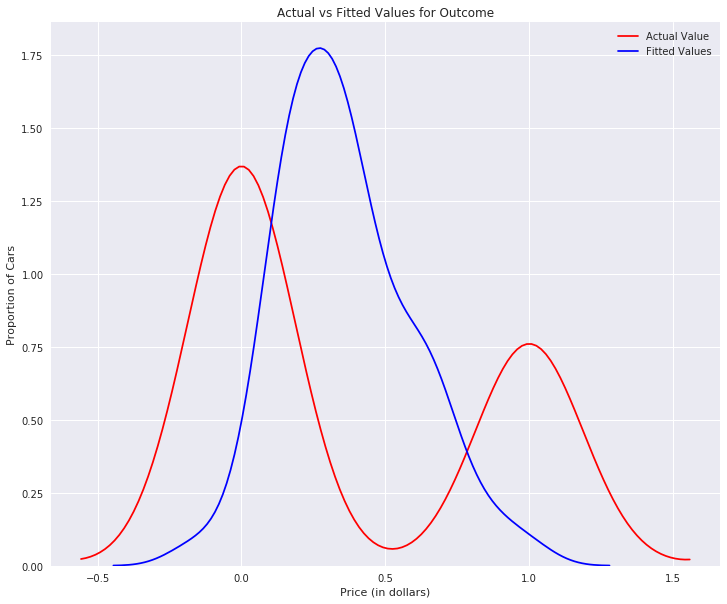

In [22]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Outcome')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=3)
Z_train=pr.fit_transform(X_train)
Z_test=pr.fit_transform(X_test)
print(Z_train.shape)
poly = LinearRegression()
poly.fit(Z_train,y_train)
y_predicted=poly.predict(Z_test)
mse = mean_squared_error(y_test, y_predicted)
print('The mean square error of price and predicted value is: ', mse)
print('The R-square of price and predicted value is: ',poly.score(Z_train,y_train))

(614, 165)
The mean square error of price and predicted value is:  0.22580553646779516
The R-square of price and predicted value is:  0.5080254267665019


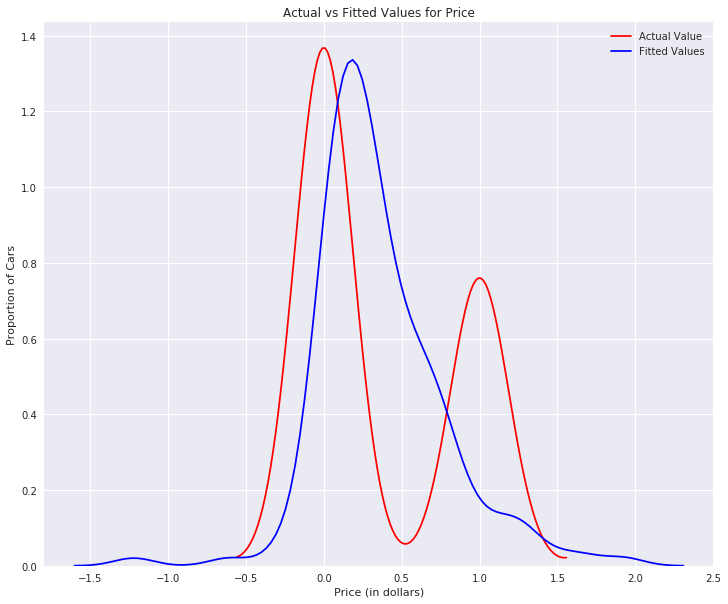

In [24]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Decision Making

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

-  What is a good R-squared value?

When comparing models, the model with the higher R-squared value is a better fit for the data.

-  What is a good MSE?

When comparing models, the model with the smallest MSE value is a better fit for the data.


### Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lm, X_train, y_train, cv=4)

In [38]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_predicted=clf.predict(X_test)
metrics.accuracy_score(y_test,y_predicted)

0.7077922077922078

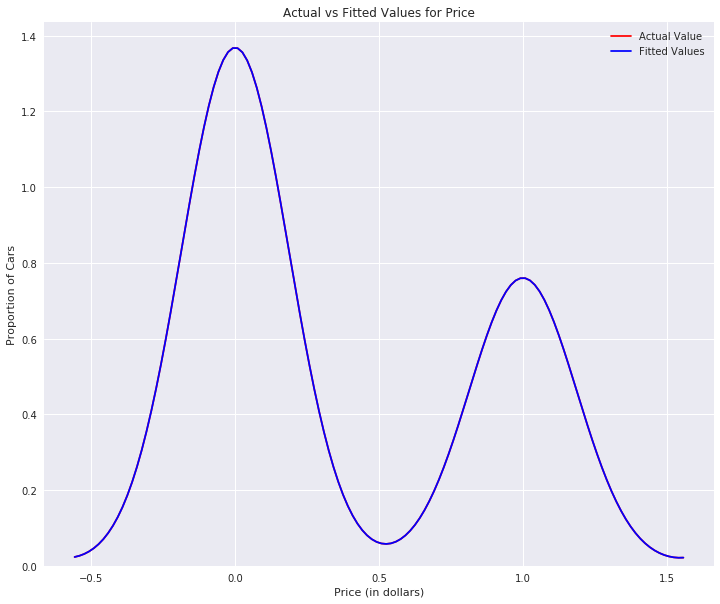

In [27]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [28]:
from sklearn import neighbors
KNN=neighbors.KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_predicted=KNN.predict(X_test)
metrics.accuracy_score(y_test,y_predicted)

0.7207792207792207

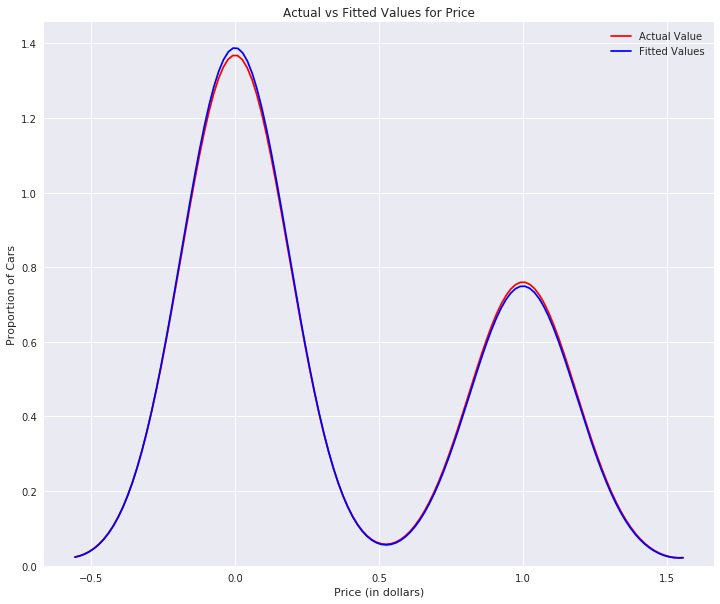

In [40]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(X_train,y_train)
y_predicted=rfr.predict(X_test)
rfr.score(X_test,y_test)

0.7727272727272727

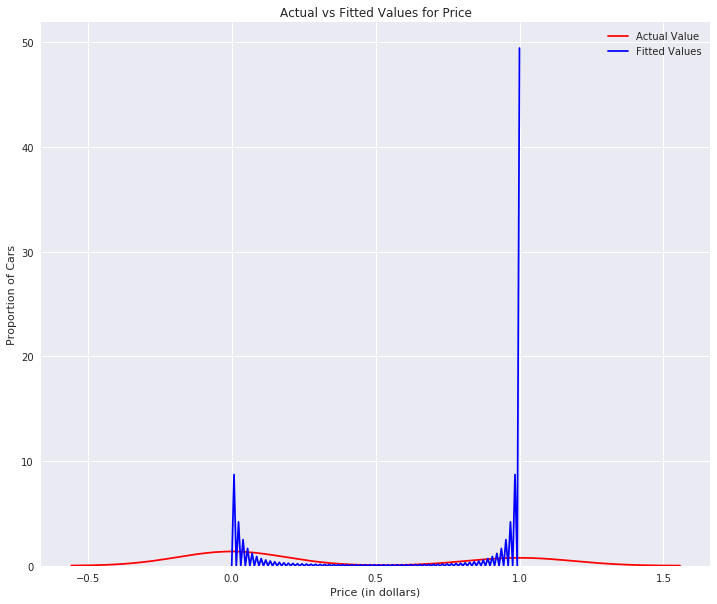

In [31]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [32]:
from sklearn import ensemble
clf1 = ensemble.GradientBoostingClassifier(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1)
clf1.fit(X_train,y_train)
y_predicted=clf1.predict(X_test)

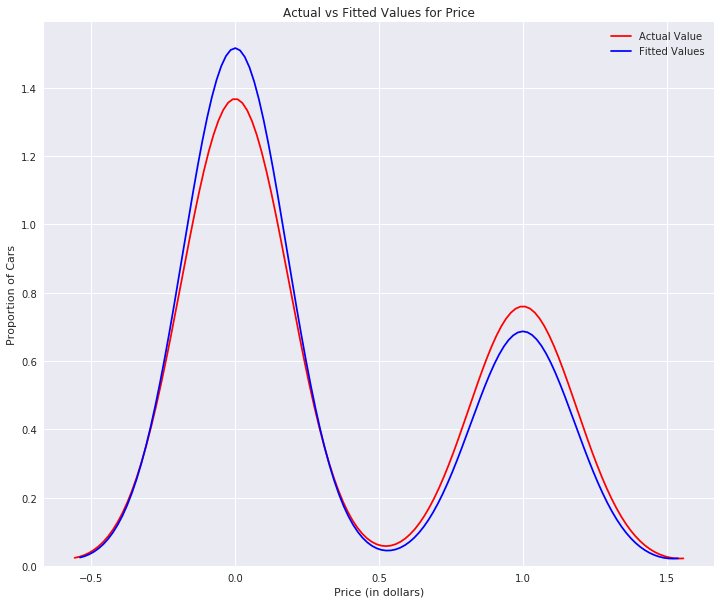

In [33]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()